## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from subprocess import call
from IPython.display import Image

from lazypredict import Supervised
from lazypredict.Supervised import LazyClassifier

import sklearn
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# from tune_sklearn import TuneGridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

c:\Users\16604\Desktop\Y4S2\DSA4263\Project\dsa4263-fraud-detection\dsa4263venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data
data = pd.read_csv("../data/dataset_cybersecurity_michelle.csv")
data.head(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.246,1,13335,1640,551,2,2,5,292,0,-1,0,0,0,1
1,2,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,329,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,24,0,0,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,305,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.249,1,14618,-1,-1,2,4,2,52,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,24,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.529,0,13335,5355,123,2,2,0,298,1,1,0,0,0,0
3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,17,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.112,1,36352,-1,-1,1,2,5,1792,0,0,0,0,0,1
4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.172,0,-1,7865,1631,1,2,1,299,1,1,0,0,0,0


In [4]:
# Overview of data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 110.8 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000
mean,2.221,0.370,0.132,1.490,0.011,0.240,0.026,0.164,0.004,0.001,0.004,0.002,0.003,0.005,0.001,0.002,0.124,1.054,39.098,1.848,0.120,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.439,18.402,0.003,0.004,-0.213,-0.256,-0.393,0.992,-0.460,-0.451,-0.456,-0.455,-0.458,-0.459,-0.457,-0.459,-0.459,-0.456,-0.460,-0.459,-0.399,12.798,-0.266,-0.393,-0.431,-0.460,-0.460,-0.458,-0.460,-0.459,-0.459,-0.460,-0.460,-0.460,-0.459,-0.459,-0.460,-0.460,-0.416,3.366,-0.781,-0.858,-0.839,-0.870,-0.892,-0.682,-0.881,-0.754,-0.902,-0.902,-0.902,-0.901,-0.900,-0.902,-0.902,-0.902,-0.840,6.295,-0.874,-0.720,0.021,0.787,-0.022,31857.094,3120.121,333.854,1.131,2.790,1.711,5806.973,0.505,0.332,0.001,0.002,0.006,0.402
std,1.315,1.200,0.706,1.964,0.124,1.027,0.293,0.992,0.098,0.081,0.084,0.077,0.125,0.336,0.068,0.102,1.892,0.

In [5]:
# Check for missing values
data.isnull().sum()
any(data<0)
# data.dropna(inplace=True)
# data.fillna(data.mean(), inplace=True)

True

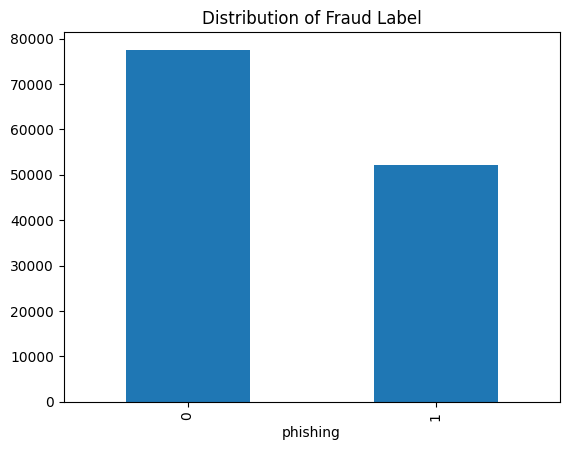

In [6]:
# Distribution of fraud label

# numerical_column = "time_response"
# category_columns = data.columns.drop("time_response")

data["phishing"].value_counts().sort_index().plot.bar(x="Target Value", y="Number of Occurrences", title="Distribution of Fraud Label")
plt.show()

In [7]:
# # Histogram
# plt.hist(data["numerical_column"], bins=20, color="skyblue", edgecolor="black")
# plt.title("Histogram of Numerical Column")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.show()

# # Box plot
# plt.boxplot(data["numerical_column"])
# plt.title("Box plot of Numerical Column")
# plt.ylabel("Value")
# plt.show()

# # Scatter plot
# plt.scatter(data["numerical_column1"], data["numerical_column2"], color="green")
# plt.title("Scatter plot of Numerical Column1 vs Numerical Column2")
# plt.xlabel("Numerical Column1")
# plt.ylabel("Numerical Column2")
# plt.show()

# # Line plot
# plt.plot(data["index_column"], data["numerical_column"], marker="o", color="blue", linestyle="-")
# plt.title("Line plot of Numerical Column over Index Column")
# plt.xlabel("Index")
# plt.ylabel("Numerical Column")
# plt.show()

# # Bar plot
# plt.bar(data["category_column"], data["numerical_column"], color="orange")
# plt.title("Bar plot of Numerical Column across Categories")
# plt.xlabel("Category")
# plt.ylabel("Numerical Column")
# plt.xticks(rotation=45)
# plt.show()

In [8]:
# Remove redundant column if min==max
remove_cols = []
for col in data.columns:
    if data[col].min() == data[col].max():
        remove_cols.append(col)
data = data.drop(remove_cols, axis=1)



Further feature selection could be done after evaluating feature importance

In [9]:
# Select all columns except the last one
cols_to_scale = data.columns[:-1]

# Apply the operation to selected columns
data[cols_to_scale] = (data[cols_to_scale] - data[cols_to_scale].min()) / \
                      (data[cols_to_scale].max() - data[cols_to_scale].min())
data.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slash_directory           0
qty_ques

In [10]:
# Overview of data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 99 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   qty_dot_url                 129698 non-null  float64
 1   qty_hyphen_url              129698 non-null  float64
 2   qty_underline_url           129698 non-null  float64
 3   qty_slash_url               129698 non-null  float64
 4   qty_questionmark_url        129698 non-null  float64
 5   qty_equal_url               129698 non-null  float64
 6   qty_at_url                  129698 non-null  float64
 7   qty_and_url                 129698 non-null  float64
 8   qty_exclamation_url         129698 non-null  float64
 9   qty_space_url               129698 non-null  float64
 10  qty_tilde_url               129698 non-null  float64
 11  qty_comma_url               129698 non-null  float64
 12  qty_plus_url                129698 non-null  float64
 13  qty_asterisk_u

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000
mean,0.053,0.011,0.006,0.034,0.001,0.010,0.001,0.006,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.088,0.008,0.088,0.011,0.000,0.000,0.089,0.063,0.003,0.004,0.039,0.031,0.034,0.087,0.540,0.091,0.012,0.020,0.054,0.054,0.091,0.090,0.027,0.009,0.540,0.049,0.003,0.011,0.056,0.028,0.032,0.540,0.540,0.135,0.180,0.135,0.108,0.054,0.108,0.090,0.027,0.009,0.540,0.540,0.003,0.004,0.009,0.004,0.007,0.003,0.011,0.013,0.011,0.011,0.009,0.020,0.049,0.008,0.014,0.020,0.098,0.020,0.002,0.002,0.063,0.012,0.021,0.045,0.489,0.080,0.176,0.015,0.085,0.140,0.086,0.010,0.505,0.074,0.501,0.501,0.006,0.402
std,0.057,0.034,0.034,0.045,0.014,0.045,0.007,0.038,0.010,0.009,0.017,0.007,0.007,0.006,0.005,0.010,0.011,0.023,0.012,0.035,0.040,0.010,0.003,0.043,0.030,0.052,0.065,0.046,0.048,0.039,0.099,0.498,0.087,0.013,0.020,0.050,0.051,0.085,0.084,0.026,0.010,0.498,0.046,0.010,0.020,0.060,0.038,0.034,0.498,0.498,0.126,0.166,0.125,0.100,0.050,0.100,0.084,0.025,0.009,0.498,0.498,0.009,0.012,0.044,0.019,0.032,0.013,0.035,0.050,0.035,0.047,0.028,0.060,0.149,0.026,0.044,0.060,0.297,0.060,0.017,0.009,0.204,0.042,0.144,0.038,0.285,0.119,0.169,0.026,0.036,0.067,0.086,0.017,0.500,0.044,0.026,0.029,0.080,0.490
min,0.000,0.000,0.000,0.000,0.000,0.00

## Model Fitting

In [11]:
# Train test split
X = data.drop("phishing", axis=1)
y = data["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=data["phishing"])

Lazy prediction runs multiple classification models.

In [12]:
# List all claasifiers in lazy prediction
Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [13]:
# Remove problematic/bad performance classifiers from Supervised.CLASSIFIERS
Supervised.CLASSIFIERS = [classifier for classifier in Supervised.CLASSIFIERS
                          if classifier[1] not in [
                              sklearn.svm.NuSVC,
                              sklearn.svm.SVC,
                              sklearn.svm.LinearSVC,
                              sklearn.calibration.CalibratedClassifierCV
                          ]]



In [14]:
# Lazy prediction
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None, predictions=True, classifiers="all" ) # verbose set as 1 to monitor progress
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  4%|▍         | 1/25 [00:06<02:43,  6.82s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9265227447956823, 'Balanced Accuracy': 0.9231239206302253, 'ROC AUC': 0.9231239206302253, 'F1 Score': 0.9264877067301567, 'Time taken': 6.823181390762329}


  8%|▊         | 2/25 [00:14<02:47,  7.29s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9841557440246723, 'Balanced Accuracy': 0.9831084593438619, 'ROC AUC': 0.9831084593438619, 'F1 Score': 0.9841490798972385, 'Time taken': 7.612608909606934}


 12%|█▏        | 3/25 [00:14<01:31,  4.17s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.47001218795776367}


 16%|█▌        | 4/25 [00:15<00:55,  2.66s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 20%|██        | 5/25 [00:16<00:44,  2.23s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9798766383962991, 'Balanced Accuracy': 0.9789648829373655, 'ROC AUC': 0.9789648829373655, 'F1 Score': 0.9798744210026621, 'Time taken': 1.4662113189697266}


 24%|██▍       | 6/25 [00:17<00:30,  1.59s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.5978797224363916, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.44741810973803947, 'Time taken': 0.34961700439453125}


 28%|██▊       | 7/25 [00:17<00:21,  1.22s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9761372397841171, 'Balanced Accuracy': 0.9757591929931007, 'ROC AUC': 0.9757591929931005, 'F1 Score': 0.9761506978970071, 'Time taken': 0.4503939151763916}


 32%|███▏      | 8/25 [00:26<01:03,  3.71s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9874710871241326, 'Balanced Accuracy': 0.9870895347402322, 'ROC AUC': 0.9870895347402323, 'F1 Score': 0.9874725572034386, 'Time taken': 9.060009479522705}


 36%|███▌      | 9/25 [00:27<00:43,  2.71s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.7288743253662298, 'Balanced Accuracy': 0.6700366595133089, 'ROC AUC': 0.6700366595133088, 'F1 Score': 0.6949262531145344, 'Time taken': 0.516627311706543}


 40%|████      | 10/25 [00:33<00:56,  3.73s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9579799537393986, 'Balanced Accuracy': 0.9563839772180489, 'ROC AUC': 0.9563839772180488, 'F1 Score': 0.957983244189513, 'Time taken': 6.017240285873413}


 44%|████▍     | 11/25 [00:33<00:37,  2.70s/it]

LabelPropagation model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 48%|████▊     | 12/25 [00:33<00:25,  1.98s/it]

LabelSpreading model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 52%|█████▏    | 13/25 [00:35<00:21,  1.76s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9033924441017733, 'Balanced Accuracy': 0.911203905780408, 'ROC AUC': 0.911203905780408, 'F1 Score': 0.9041737744796897, 'Time taken': 1.233612298965454}


 56%|█████▌    | 14/25 [00:36<00:17,  1.61s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9223592906707787, 'Balanced Accuracy': 0.9210702888867217, 'ROC AUC': 0.9210702888867217, 'F1 Score': 0.9224926061877424, 'Time taken': 1.266059398651123}


 60%|██████    | 15/25 [00:36<00:12,  1.24s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.3986642360687256}


 64%|██████▍   | 16/25 [00:37<00:09,  1.05s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.905242868157286, 'Balanced Accuracy': 0.9064892098890394, 'ROC AUC': 0.9064892098890394, 'F1 Score': 0.9056549098317407, 'Time taken': 0.6005356311798096}


 68%|██████▊   | 17/25 [00:37<00:07,  1.09it/s]

{'Model': 'Perceptron', 'Accuracy': 0.8913646877409407, 'Balanced Accuracy': 0.8814169949618537, 'ROC AUC': 0.8814169949618537, 'F1 Score': 0.8906597530503608, 'Time taken': 0.6165435314178467}


 72%|███████▏  | 18/25 [00:38<00:06,  1.06it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.7042020046260601, 'Balanced Accuracy': 0.6336930862210264, 'ROC AUC': 0.6336930862210264, 'F1 Score': 0.650226150453162, 'Time taken': 1.0022220611572266}


 76%|███████▌  | 19/25 [00:48<00:21,  3.56s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9883191981495759, 'Balanced Accuracy': 0.9878458844215374, 'ROC AUC': 0.9878458844215375, 'F1 Score': 0.9883191064667579, 'Time taken': 9.646004915237427}


 80%|████████  | 20/25 [00:49<00:13,  2.63s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9037008481110255, 'Balanced Accuracy': 0.9114304311438587, 'ROC AUC': 0.9114304311438587, 'F1 Score': 0.9044760771502401, 'Time taken': 0.4744234085083008}


 84%|████████▍ | 21/25 [00:50<00:08,  2.21s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9035851966075559, 'Balanced Accuracy': 0.9113337131091692, 'ROC AUC': 0.9113337131091691, 'F1 Score': 0.9043622635179099, 'Time taken': 1.2136025428771973}


 88%|████████▊ | 22/25 [00:51<00:05,  1.84s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.9158057054741712, 'Balanced Accuracy': 0.9185558981499784, 'ROC AUC': 0.9185558981499785, 'F1 Score': 0.9162361247094858, 'Time taken': 1.0022268295288086}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 96%|█████████▌| 24/25 [00:52<00:01,  1.19s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9710871241326138, 'Balanced Accuracy': 0.9697152538598217, 'ROC AUC': 0.9697152538598217, 'F1 Score': 0.9710807333827347, 'Time taken': 0.8421401977539062}
[LightGBM] [Info] Number of positive: 41721, number of negative: 62037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 103758, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402099 -> initscore=-0.396726
[LightGBM] [Info] Start training from score -0.396726


100%|██████████| 25/25 [00:53<00:00,  2.13s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9633770239013107, 'Balanced Accuracy': 0.962058893145249, 'ROC AUC': 0.962058893145249, 'F1 Score': 0.9633821771899386, 'Time taken': 1.0336706638336182}


In [15]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.988,0.988,0.988,0.988,9.646
ExtraTreesClassifier,0.987,0.987,0.987,0.987,9.060
BaggingClassifier,0.984,0.983,0.983,0.984,7.613
DecisionTreeClassifier,0.980,0.979,0.979,0.980,1.466
ExtraTreeClassifier,0.976,0.976,0.976,0.976,0.450
XGBClassifier,0.971,0.970,0.970,0.971,0.842
LGBMClassifier,0.963,0.962,0.962,0.963,1.034
KNeighborsClassifier,0.958,0.956,0.956,0.958,6.017
AdaBoostClassifier,0.927,0.923,0.923,0.926,6.823


Through lazy prediction, the best performing models are **RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, DecisionTreeClassifier**

In [16]:
# Rf Classifier
clf = RandomForestClassifier().fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
 
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.988396299151889
Recall: 0.9858115233438788


Let's experiment if replacing -1 helps the performance

In [68]:
# Create a new DataFrame 'cleaned_df' with -1 replaced by mean
cleaned_data = data.copy()  # Make a copy of the original DataFrame

# Replace -1 with the mean of each column
for col in cleaned_data .columns[:-1]:
    if -1 in cleaned_data[col].values:
        mean_val = cleaned_data [col][cleaned_data[col] != -1].mean()
        cleaned_data[col] = cleaned_data[col].replace(to_replace=-1, value=mean_val)

# Train test split
clean_X = cleaned_data.drop("phishing", axis=1)[:100]
clean_y = cleaned_data["phishing"][:100]
clean_X_train, clean_X_test, clean_y_train, clean_y_test = train_test_split(clean_X, clean_y, test_size=0.2, random_state=20, stratify=cleaned_data["phishing"][:100])

# Rf Classifier
clean_clf = RandomForestClassifier().fit(clean_X_train, clean_y_train)

# Make predictions on the test set
clean_y_pred = clean_clf.predict(clean_X_test)
 
# Calculate accuracy
accuracy = accuracy_score(clean_y_test, clean_y_pred)
recall = recall_score(clean_y_test, clean_y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)


Accuracy: 0.9
Recall: 0.8181818181818182


In [69]:
# Hyperparameters
print("max_depth: ", max((e.tree_.max_depth for e in clf.estimators_)))
print("min_depth: ", min((e.tree_.max_depth for e in clf.estimators_)))
print("max_depth: ", clf.get_params())

max_depth:  49
min_depth:  32
max_depth:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Explainer expected value: [0.426625 0.573375]


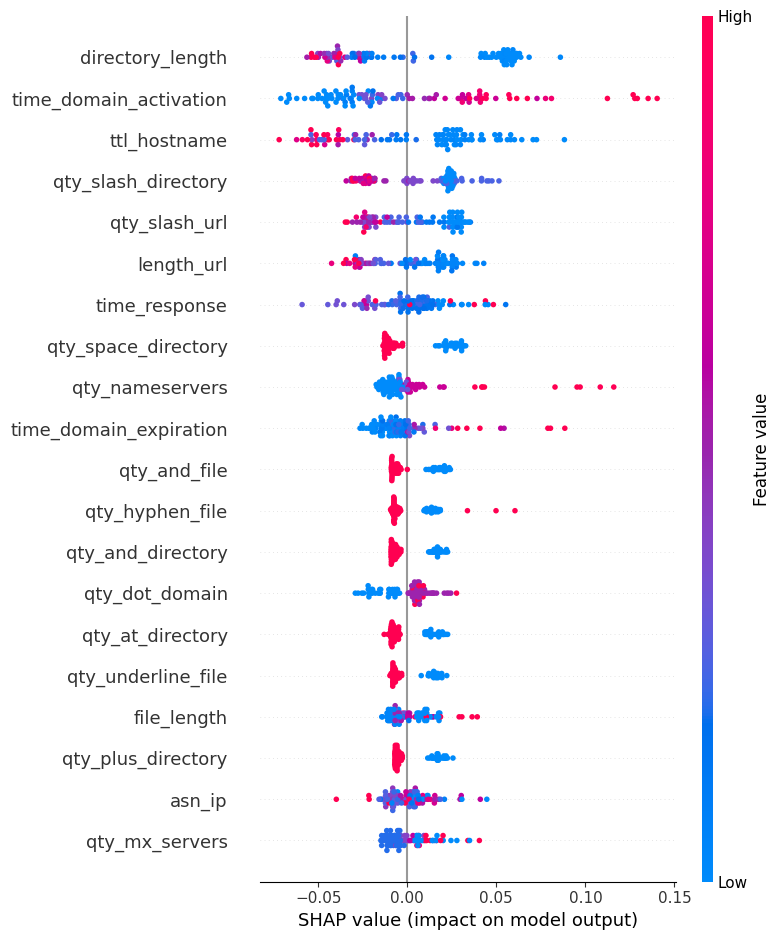

In [115]:
#Construct SHAP Explainer
explainer = shap.Explainer(clean_clf)  
shap_values = explainer.shap_values(clean_X[:100])
shap_values = shap_values[..., 0]
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")
#
select = range(100)
features = clean_X.iloc[select]
features_display = clean_X.loc[features.index]
shap.summary_plot(shap_values, clean_X)

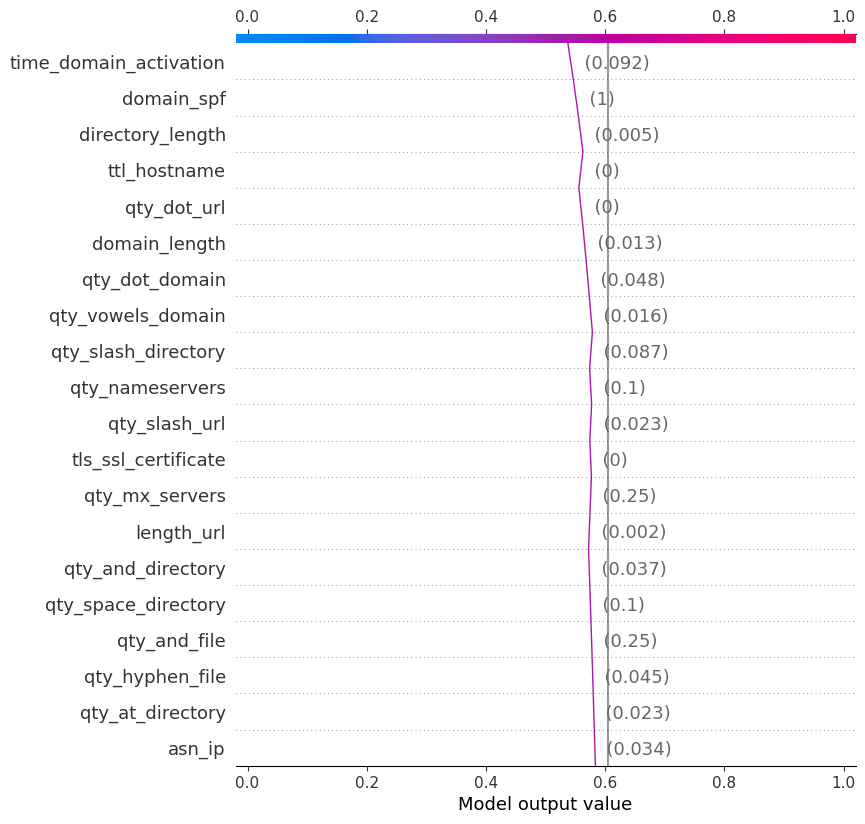

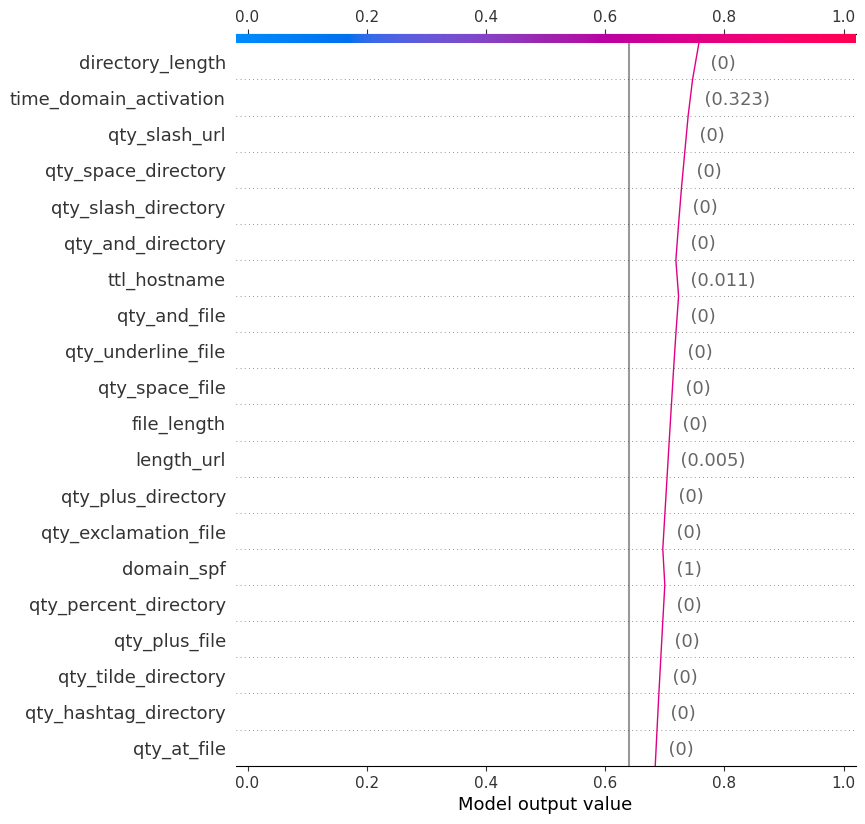

In [118]:
#SHAP Decision Plot
shap.decision_plot(expected_value[0], shap_values[0], features_display.iloc[0], link='logit')
shap.decision_plot(expected_value[1], shap_values[50], features_display.iloc[50], link='logit')

#### !! CAUTION: This cell takes long time to run !!

In [ ]:
# Hyperparameter tuning

# param_grid = {
#     "estimator": [DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier()],
#     "base_estimator__max_depth" : [1, 2, 3, 4, 5],
#     "max_samples" : [0.05, 0.1, 0.2, 0.5]
# }

param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [30, 50, 70],
    "min_samples_split": [2, 4, 6],
    "max_features": ["sqrt", "log2"]
}

model = RandomizedSearchCV(clean_clf, param_grid, cv=5, n_iter=20, verbose=1)
model.fit(clean_X_train, clean_y_train)

# Get the best hyperparameters
best_params = model.best_params_

# Make predictions on the test set
y_pred = model.predict(clean_X_test)
 
# Calculate accuracy
accuracy = accuracy_score(clean_y_test, y_pred)
recall = recall_score(clean_y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
print(f"Best Hyperparameters: {best_params}")

## Evaluation

In [ ]:
# Feature importance of initial model

# feature_importance = clf.feature_importances_
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)
sorted_idx = np.argsort(feature_importances)[-20:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance of Classification of Initial Model")
plt.show()

In [ ]:
# Feature importance of tuned model

# feature_importance = model.feature_importances_
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.best_estimator_
], axis=0)
sorted_idx = np.argsort(feature_importances)[-20:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance of Classification of Tuned Model")
plt.show()

In [ ]:
# Export tree as dot file

# for i in range(len(model.best_estimator_)):
#     export_graphviz(model.best_estimator_[i], out_file=f"visualization/tree_{i}.dot", 
#                 feature_names=cleaned_data.drop("phishing", axis=1).columns,
#                 class_names=["phishing"],
#                 filled=True,
#                 rounded=True, proportion=False, 
#                 precision=2, filled=True)

#     # Convert to png using system command (requires Graphviz)
#     # os.system('dot -Tpng tree.dot -o tree.png')
#     call(["dot", "-Tpng", f"tree_{i}.dot", "-o", f"tree_{i}.png", "-Gdpi=300"])

#     # Display in jupyter notebook
#     Image(filename = f"tree_{i}.png")

# Alternatively
# for i in range(len(model.best_estimator_)):
#     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
#     tree.plot_tree(model.best_estimator_[i],
#                 feature_names=list(cleaned_data.columns.drop("phishing")), 
#                 class_names=["phishing"],
#                 filled=True, 
#                 rounded=True, proportion=False, 
#                 precision=2)
    
#     fig.savefig(f"visualization/tree_{i}.png")

## More visualization

In [ ]:
from sklearn.utils.discovery import all_displays

displays = all_displays()
displays

## Confusion Matrix

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(clean_y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

## Precision-Recall

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, _ = precision_recall_curve(clean_y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

## ROC Curve

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(clean_y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="RandomForest")
display.plot(color='black', linestyle='-')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot([0, 0], [0, 1], color='red', linestyle='-.')
plt.plot([0, 1], [1, 1], color='red', linestyle='-.')
plt.show()

## Calibration Display

A perfectly calibrated model would have a calibration curve closely aligned with the 45-degree diagonal line on the plot. This line represents ideal calibration, where the **predicted probabilities match the observed frequencies**. Deviations from this diagonal line indicate either overconfidence or underconfidence in the model's predictions.

- Overconfidence: If the curve lies above the diagonal line, the model is overconfident. This means there are more instances with predicted probabilities close to 1 than there should be, and the model's confidence in its predictions is higher than the actual success rate.
- Underconfidence: If the curve lies below the diagonal line, the model is underconfident. In this case, instances with high predicted probabilities are less frequent than they should be and the model's confidence is lower than the actual success rate.

In [ ]:
from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_estimator(model, clean_X_test, clean_y_test)
plt.show()

## Decision Boundary

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Reconstruct best model
n_estimators = best_params["n_estimators"]
min_samples_split = best_params["min_samples_split"]
max_features = best_params["max_features"]
max_depth = best_params["max_depth"]
tree = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, max_features=max_features, max_depth=max_depth)

tree = tree.fit(clean_X_train[clean_X_train.columns[sorted_idx[-2:]]], clean_y_train)
display = DecisionBoundaryDisplay.from_estimator(
    tree, clean_X_train[clean_X_train.columns[sorted_idx[-2:]]], response_method="predict",
    xlabel=clean_X_train.columns[sorted_idx[-1]], ylabel=clean_X_train.columns[sorted_idx[-2]],
    alpha=0.5,
)
clean_df = pd.concat([clean_X_train, clean_y_train], axis=1)
samples = clean_df.sample(frac=0.001, replace=False, random_state=1)
display.ax_.scatter(clean_X_train[clean_X_train.columns[sorted_idx[-1]]], clean_X_train[clean_X_train.columns[sorted_idx[-2]]], c=clean_y_train, edgecolor="k")
plt.show()

## Learning Curve

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf, clean_X_train, clean_y_train)
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()